Assignment: Introduction to Machine Learning :

1) Regression (Mobile Price Prediction)

2) Classification (Bank Note Authentication)

#Part 1: Regression - Mobile Price Prediction

Step 1: Import libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Step 2: Mount Google Drive

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 3: Load train & test datasets

In [34]:
data_path = "/content/drive/My Drive/MLTA1/Regression/Mobile-Price-Prediction-cleaned_data.csv"
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
print(df.head())
print(df.columns)

Dataset shape: (807, 8)
   Ratings  RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0      4.3  4.0  128.0         6.00           48       13.0           4000   
1      3.4  6.0   64.0         4.50           48       12.0           4000   
2      4.3  4.0    4.0         4.50           64       16.0           4000   
3      4.4  6.0   64.0         6.40           48       15.0           3800   
4      4.5  6.0  128.0         6.18           35       15.0           3800   

   Price  
0  24999  
1  15999  
2  15000  
3  18999  
4  18999  
Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')


Step 4: Prepare features & labels

In [35]:
target_col = "Price"   # <<== change this if your CSV has a different name
X = df.drop(target_col, axis=1).values
y = df[target_col].values

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term (intercept column)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

Step 5: Closed-form Solution

In [36]:
theta_closed = np.linalg.inv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)
y_pred_closed = X_test_b @ theta_closed

print("\n--- Closed-form Solution ---")
print("MSE:", mean_squared_error(y_test, y_pred_closed))
print("R²:", r2_score(y_test, y_pred_closed))


--- Closed-form Solution ---
MSE: 239357657.43148887
R²: 0.43322813972090757


Step 6: Gradient Descent Implementation

In [37]:
# Scale features for stability
scaler_gd = StandardScaler()
X_train_scaled = scaler_gd.fit_transform(X_train)
X_test_scaled = scaler_gd.transform(X_test)

# Add bias term
X_train_scaled_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        gradients = (2/m) * X.T @ (X @ theta - y)
        theta -= lr * gradients
    return theta

theta_gd = gradient_descent(X_train_scaled_b, y_train, lr=0.01, epochs=2000)
y_pred_gd = X_test_scaled_b @ theta_gd

print("\n--- Gradient Descent (with Standardization) ---")
print("MSE:", mean_squared_error(y_test, y_pred_gd))
print("R²:", r2_score(y_test, y_pred_gd))


--- Gradient Descent (with Standardization) ---
MSE: 239357657.3541652
R²: 0.43322813990400133


Step 7: Plot Predicted vs Actual (Closed-form & GD)

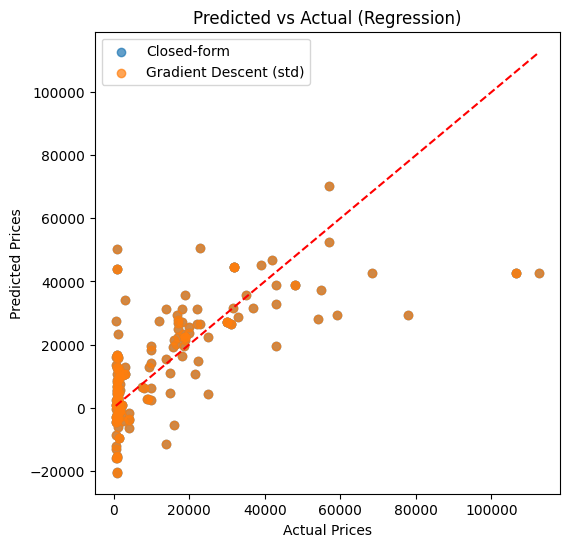

In [38]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_closed, label="Closed-form", alpha=0.7)
plt.scatter(y_test, y_pred_gd, label="Gradient Descent (std)", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Predicted vs Actual (Regression)")
plt.show()

Step 8: Ridge Regression (Closed-form L2 Regularization)

In [39]:
def ridge_closed_form(X, y, lam):
    n = X.shape[1]
    return np.linalg.inv(X.T @ X + lam * np.identity(n)) @ (X.T @ y)

lambdas = [0.01, 0.1, 1, 10]
print("\n--- Ridge Regression (Closed-form, Standardized Data) ---")
for lam in lambdas:
    theta_ridge = ridge_closed_form(X_train_scaled_b, y_train, lam)
    y_pred_ridge = X_test_scaled_b @ theta_ridge
    print(f"λ={lam}, MSE={mean_squared_error(y_test, y_pred_ridge):.4f}, R²={r2_score(y_test, y_pred_ridge):.4f}")


--- Ridge Regression (Closed-form, Standardized Data) ---
λ=0.01, MSE=239356226.0525, R²=0.4332
λ=0.1, MSE=239343354.7082, R²=0.4333
λ=1, MSE=239215733.1646, R²=0.4336
λ=10, MSE=238045133.9120, R²=0.4363


Step 9: Ridge Regression (Gradient Descent with L2)

In [40]:
def ridge_gradient_descent(X, y, lam=1.0, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        gradients = (2/m) * (X.T @ (X @ theta - y) + lam * theta)
        gradients[0] -= (2/m) * lam * theta[0]  # don't regularize bias
        theta -= lr * gradients
    return theta

print("\n--- Ridge Regression (Gradient Descent, Standardized Data) ---")
for lam in lambdas:
    theta_ridge_gd = ridge_gradient_descent(X_train_scaled_b, y_train, lam=lam, lr=0.01, epochs=2000)
    y_pred_ridge_gd = X_test_scaled_b @ theta_ridge_gd
    print(f"λ={lam}, MSE={mean_squared_error(y_test, y_pred_ridge_gd):.4f}, R²={r2_score(y_test, y_pred_ridge_gd):.4f}")


--- Ridge Regression (Gradient Descent, Standardized Data) ---
λ=0.01, MSE=239356078.0561, R²=0.4332
λ=0.1, MSE=239341871.7277, R²=0.4333
λ=1, MSE=239200533.8927, R²=0.4336
λ=10, MSE=237857213.7205, R²=0.4368


Step 10: With and Without Standardization

In [41]:
# (already scaled, so re-check difference with raw features)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

theta_ridge_no_std = ridge_closed_form(X_train_b, y_train, 1.0)
y_pred_ridge_no_std = X_test_b @ theta_ridge_no_std

theta_ridge_std = ridge_closed_form(X_train_scaled_b, y_train, 1.0)
y_pred_ridge_std = X_test_scaled_b @ theta_ridge_std

print("\n--- Ridge (λ=1) Comparison ---")
print("Without Standardization MSE:", mean_squared_error(y_test, y_pred_ridge_no_std))
print("With Standardization MSE:", mean_squared_error(y_test, y_pred_ridge_std))


--- Ridge (λ=1) Comparison ---
Without Standardization MSE: 237321910.71548325
With Standardization MSE: 239215733.1645846


Step 11: Plot Predicted vs Actual for Different λ

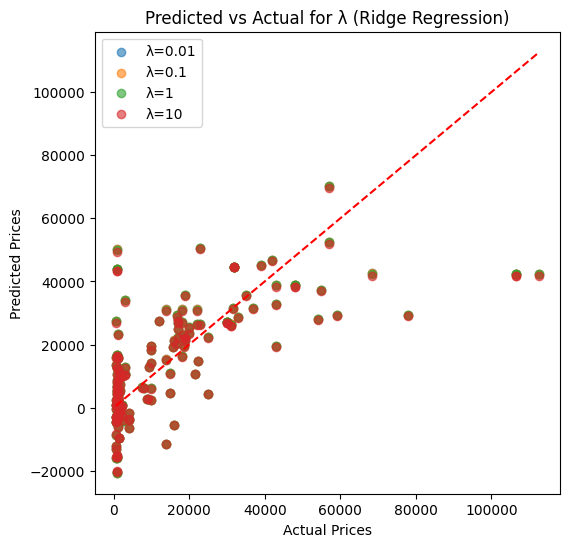

In [42]:
plt.figure(figsize=(6,6))
for lam in lambdas:
    theta_ridge = ridge_closed_form(X_train_scaled_b, y_train, lam)
    y_pred_ridge = X_test_scaled_b @ theta_ridge
    plt.scatter(y_test, y_pred_ridge, alpha=0.6, label=f"λ={lam}")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Predicted vs Actual for λ (Ridge Regression)")
plt.show()

Step 12: Feature Importance from Ridge Regression

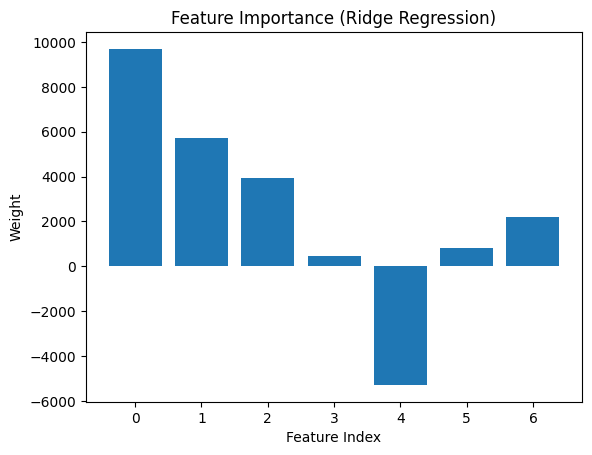

In [43]:
importance = theta_ridge_std[1:]  # exclude bias
plt.bar(range(len(importance)), importance)
plt.title("Feature Importance (Ridge Regression)")
plt.xlabel("Feature Index")
plt.ylabel("Weight")
plt.show()

#Part 2: Classification - Bank Note Authentication

Step 1: Import libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

Step 2: Mount Google Drive

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 3: Load dataset

In [46]:
data_path = "/content/drive/My Drive/MLTA1/Classification/BankNote_Authentication.csv"
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
print(df.head())
print(df.columns)

Dataset shape: (1372, 5)
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')


Step 4: Prepare features & labels

In [47]:
X = df.drop("class", axis=1).values
y = df["class"].values

# Split dataset (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Train Logistic Regression (No Regularization)

In [48]:
clf_no_reg = LogisticRegression(penalty=None, max_iter=1000, solver="lbfgs")
clf_no_reg.fit(X_train, y_train)

y_train_pred = clf_no_reg.predict(X_train)
y_test_pred = clf_no_reg.predict(X_test)

print("\n--- Logistic Regression (No Regularization) ---")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


--- Logistic Regression (No Regularization) ---
Train Accuracy: 0.9927073837739289
Test Accuracy: 0.9854545454545455


Step 6: Logistic Regression with L2 Regularization

In [49]:
lambdas = [0.01, 0.1, 1, 10]
train_accs, test_accs = [], []

print("\n--- Logistic Regression with L2 Regularization ---")
for lam in lambdas:
    clf_l2 = LogisticRegression(C=1/lam, penalty="l2", max_iter=1000)
    clf_l2.fit(X_train, y_train)

    train_acc = clf_l2.score(X_train, y_train)
    test_acc = clf_l2.score(X_test, y_test)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"λ={lam}, Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}")


--- Logistic Regression with L2 Regularization ---
λ=0.01, Train Acc=0.993, Test Acc=0.985
λ=0.1, Train Acc=0.993, Test Acc=0.985
λ=1, Train Acc=0.992, Test Acc=0.985
λ=10, Train Acc=0.988, Test Acc=0.985


Step 7: Plot Training and Test Accuracy vs λ

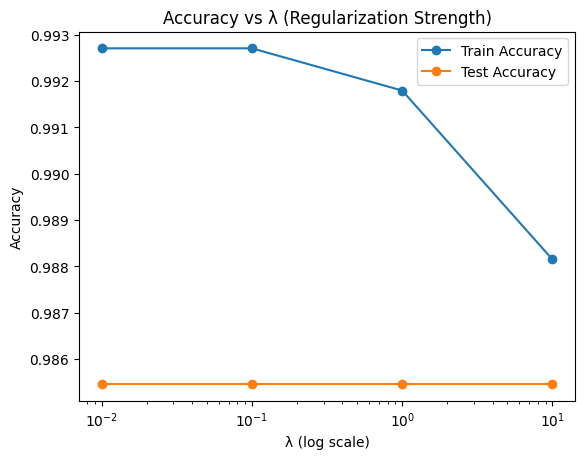

In [50]:
plt.plot(lambdas, train_accs, marker="o", label="Train Accuracy")
plt.plot(lambdas, test_accs, marker="o", label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ (Regularization Strength)")
plt.legend()
plt.show()

Step 8: 3D Visualization (using first 3 features)

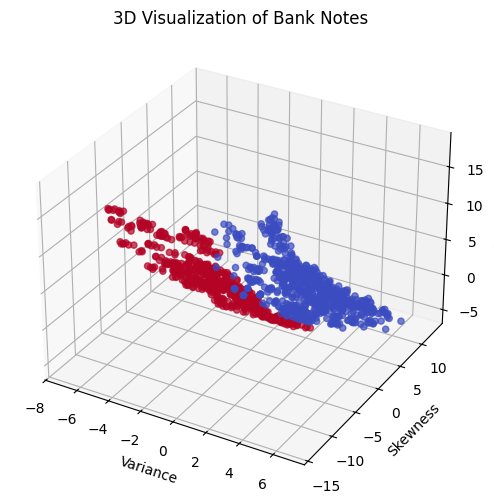

In [51]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap="coolwarm", alpha=0.7)
ax.set_xlabel("Variance")
ax.set_ylabel("Skewness")
ax.set_zlabel("Curtosis")
plt.title("3D Visualization of Bank Notes")
plt.show()

Step 9: Outlier Injection


In [52]:
X_outlier = X_train.copy()
X_outlier[:10] = X_outlier[:10] + 10  # artificially shift first 10 samples

clf_outlier = LogisticRegression(max_iter=1000)
clf_outlier.fit(X_outlier, y_train)

y_test_pred_outlier = clf_outlier.predict(X_test)

print("\n--- Impact of Outliers ---")
print("Original Data Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Outlier Data Test Accuracy:", accuracy_score(y_test, y_test_pred_outlier))


--- Impact of Outliers ---
Original Data Test Accuracy: 0.9854545454545455
Outlier Data Test Accuracy: 0.9745454545454545
